In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [18]:
df=pd.read_csv(r"C:\Users\abiav\Machine_learning_project\DBSCAN\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [34]:
print("income",df["Income($)"].unique())
print("Age",df["Age"].unique())

income [ 70000  90000  61000  60000 150000 155000 160000 162000 156000 130000
 137000  45000  48000  51000  49500  53000  65000  63000  64000  80000
  82000  58000]
Age [27 29 28 42 39 41 38 36 35 37 26 32 40 43]


<Axes: xlabel='Age', ylabel='count'>

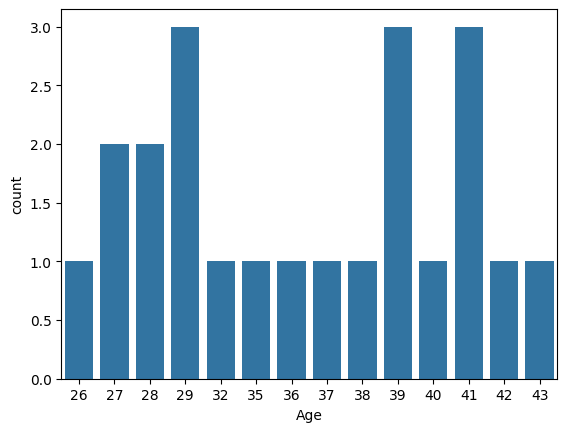

In [43]:
sns.countplot(data=df, x="Age")

In [44]:
df.corr()

,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


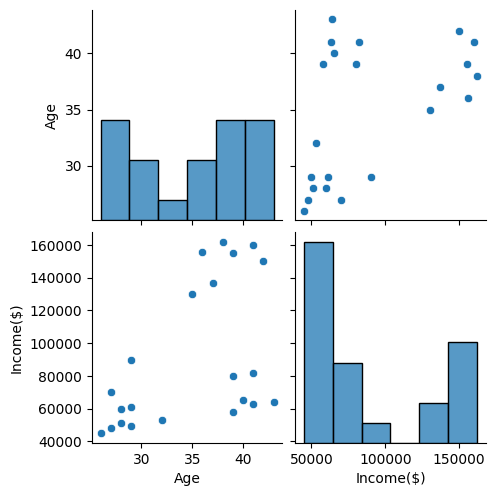

In [45]:
sns.pairplot(data=df)

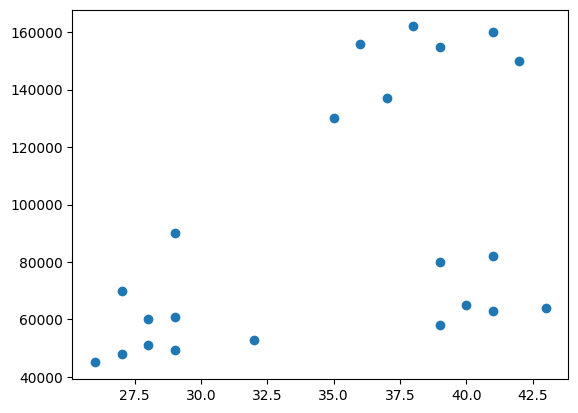

In [46]:
plt.scatter(df["Age"],df["Income($)"])

In [50]:
scaler=StandardScaler()
scaler.fit(df)

,copy,True
,with_mean,True
,with_std,True


In [51]:
scaler_train=scaler.transform(df)

In [52]:
from sklearn.metrics import v_measure_score
from sklearn.cluster import DBSCAN

labels:  [-1]
Estimated no. of clusters: 0
Estimated no. of noise points: 22


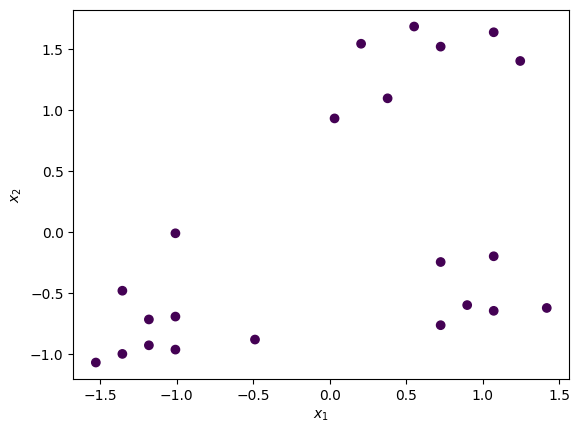

In [53]:
dbscan_cluster = DBSCAN(eps=0.5,min_samples=15)
dbscan_cluster.fit(scaler_train)
print('labels: ',np.unique(dbscan_cluster.labels_))
# Visualizing DBSCAN
plt.scatter(scaler_train[:, 0], 
scaler_train[:, 1], 
c=dbscan_cluster.labels_, 
label=scaler_train)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)